In [1]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import pandas as pd
from splinter import Browser
import re

# Mars Nasa

In [3]:
news_title = ''
news_teaser = ''
def mars_nasa():
    # URL of page to be scraped
    url = 'https://mars.nasa.gov/news/?page=1&per_page=40&order=publish_date+desc%2Ccreated_at+desc&search=&category=19%2C165%2C184%2C204&blank_scope=Latest'
    # Retrieve page with the requests module
    response = requests.get(url)
    # Create BeautifulSoup object; parse with 'html.parser'
    soup = BeautifulSoup(response.text, 'html.parser')
    #print(soup.prettify())
    news_title = soup.find('div', class_='rollover_description_inner').text.strip()
    news_teaser = soup.find('div', class_='content_title').text.strip()
    
    pass

mars_nasa()

# Feature Mars Image

In [4]:
feature_image_url = ''

In [5]:
#Activate driver
# https://splinter.readthedocs.io/en/latest/drivers/chrome.html
!which chromedriver

/usr/local/bin/chromedriver


In [6]:
#Start automated test software in Chrome
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [7]:
def feature_image():
    nasa_url = 'https://www.jpl.nasa.gov'
    #images_url = 'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA16217_hires.jpg'
    destiny = str(nasa_url) + "/spaceimages/?search=&category=Mars"
    #Load source
    browser.visit(destiny)
    html_source = browser.html
    #Click <Full image> pic
    browser.find_by_id('full_image').click()
    #Go to More Info
    soup = BeautifulSoup(html_source, 'html.parser')
    #print(soup.prettify())
    buttons = soup.find('article', class_='carousel_item')
    url_pic = '/spaceimages/images/largesize/'
    id_pic = buttons.a['data-link'] + ":"
    #Get image ID cleaning id_pic string
    m = re.search('=(.+?):', id_pic)
    if m:
        featured_image_url = nasa_url + url_pic + m.group(1) + '_hires.jpg'
        browser.visit(featured_image_url)
        
    pass

feature_image()

In [27]:
mars_weather = ''
def mars_tweet():
    #URL to be scrapped
    url = "https://twitter.com/MarsWxReport"
    # Retrieve page with the requests module
    response = requests.get(url)
    # Create BeautifulSoup object; parse with 'html.parser'
    soup = BeautifulSoup(response.text, 'html.parser')
    #print(soup.prettify())
    tweet = soup.find_all('div', class_='js-tweet-text-container')
    for t in tweet:
        mars_weather = t.p.text
    pass
    
mars_tweet()

InSight sol 249 (2019-08-09) low -98.8ºC (-145.8ºF) high -26.0ºC (-14.8ºF)
winds from the SSE at 4.4 m/s (9.8 mph) gusting to 17.5 m/s (39.1 mph)
pressure at 7.60 hPapic.twitter.com/jDOsvHTwYg


In [4]:
job_title = []
job_desc = []
job_salary = []
job_company = []
job_link = []
job_type = []

def scrap_pagination():
    browser.visit(source)
    html_source = browser.html
    source_soup = BeautifulSoup(html_source, 'html.parser')
    job_result_pag = source_soup.find('div', class_='searchCount-a11y-contrast-color').text
    job_result_pag = [int(s) for s in job_result_pag.split() if s.isdigit()]
    job_pag_total = int((int(job_result_pag[1]) / 10) + 1)
    if job_pag_total > 10:
        job_pag_total = 110
    else:
        job_pag_total = int(job_pag_total + 10)
    
    return job_pag_total



342

In [63]:
job_list = list(zip(job_title,job_desc,job_salary,job_company,job_link,job_type))

# (T)ransform

In [64]:
jobs_df = pd.DataFrame(job_list, columns =['job_title','job_description', 'job_salary', 'job_company', 'job_link', 'job_type'])

In [65]:
len(jobs_df)

342

In [66]:
jobs_df.head()

,job_title,job_description,job_salary,job_company,job_link,job_type
0,Analista de datos - R Studio - Python,"Análisis estadístico de datos, simples y avanz...",18000,Adecco,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python
1,Desarrollador Back-end Jr.,Somos un equipo multicultural trabajando en la...,15000 - 25000,Entropy,/pagead/clk?mo=r&ad=-6NYlbfkN0A7W8bu-BrN6O4YMq...,python
2,Backend Python,Experiencia en Python y Django o Flask. … Empr...,25000 - 45000,Page Group,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python
3,ANALISTA DE BASE DE DATOS,"Empresa con 14 años en el mercado, solicita de...",8500 - 10000,ION APS,/company/ION-APS/jobs/Analista-base-datos-09de...,python
4,Analista de Calidad de Datos,ANALISTA DE CALIDAD DE DATOS*. … Ejecutar las ...,17000 - 20000,Nielsen,/company/Nielsen/jobs/Analista-calidad-datos-1...,python


In [67]:
# make string version of original column, call it 'col'
jobs_df['salary'] = jobs_df['job_salary'].astype(str)
# make the new columns using string indexing
jobs_df['min_salary'] = jobs_df['salary'].str[0:5].astype(float)
jobs_df['max_salary'] = jobs_df['salary'].str[7:13]

# get rid of the extra variable (if you want)
jobs_df.drop('salary', axis=1, inplace=True)
jobs_df.drop('job_salary', axis=1, inplace=True)

In [68]:
jobs_df.head()

,job_title,job_description,job_company,job_link,job_type,min_salary,max_salary
0,Analista de datos - R Studio - Python,"Análisis estadístico de datos, simples y avanz...",Adecco,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python,18000.0,
1,Desarrollador Back-end Jr.,Somos un equipo multicultural trabajando en la...,Entropy,/pagead/clk?mo=r&ad=-6NYlbfkN0A7W8bu-BrN6O4YMq...,python,15000.0,25000
2,Backend Python,Experiencia en Python y Django o Flask. … Empr...,Page Group,/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBd...,python,25000.0,45000
3,ANALISTA DE BASE DE DATOS,"Empresa con 14 años en el mercado, solicita de...",ION APS,/company/ION-APS/jobs/Analista-base-datos-09de...,python,8500.0,10000
4,Analista de Calidad de Datos,ANALISTA DE CALIDAD DE DATOS*. … Ejecutar las ...,Nielsen,/company/Nielsen/jobs/Analista-calidad-datos-1...,python,17000.0,20000


In [71]:
jobs_df_2 = jobs_df.groupby('job_type')['min_salary'].mean()

In [72]:
jobs_df_2.head()

job_type
javascript    20388.463636
mongodb       33430.982759
python        20232.142857
sql           18802.677778
Name: min_salary, dtype: float64

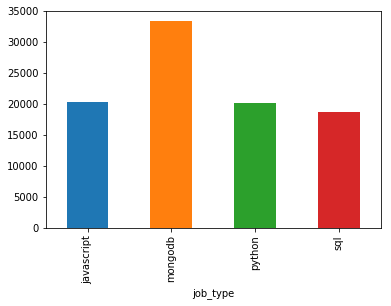

In [73]:
jobs_df_2.plot(kind='bar')

# (L)oad

In [74]:
rds_connection_string = "postgres:python123@localhost:5432/customer_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [75]:
engine.table_names()

['county', 'premise', 'indeed_jobs']

In [76]:
jobs_df.to_sql(name='indeed_jobs', con=engine, if_exists='append', index=False)

In [77]:
engine.execute('SELECT * FROM indeed_jobs').fetchall()

[('Análisis estadístico de datos, simples y avanzados, utilizando programas estadísticos como R , Python. … Importante empresa de Investigación de merca ... (202 characters truncated) ...                                                                                                                                                      ', 'Adecco                                                                                                                                                ... (202 characters truncated) ...                                                                                                                                                      ', '/pagead/clk?mo=r&ad=-6NYlbfkN0Af3D-fRanEpkMpBdIcpgKxi0Ygnvb0NhaTISU6KCNjn2D0_QrykThrdAvAvOC1LdCDwya2RmzGsmTW_ZuIJb3687Y9OmFVGyInqmC7jUVAWplfYly5o5Ce0 ... (702 characters truncated) ...                                                                                                                                         